In [1]:
library(readxl)
library(data.table)
library(ggplot2)
library(ggprism)
library(ggforce)
library(ggetho)
library(ggsignif)
source("R/plot.R")
source("R/Cbind.R")

Loading required package: behavr



In [2]:
data <- data.table::fread(file = "tidy_data_wide.csv")
sheets <- c("20min STM", "1hr STM", "3hr STM")
experiments <- c("20min STM", "1hr STM", "3hr STM")
genotypes <- c("Iso31", "MB010B.(II)SPARC-Chrimson ISO", "MB010B.(II)SPARC-GFP ISO")
data<-data[experiment %in% experiments,]
data$experiment <- factor(data$experiment, levels=experiments)
wts <- c("Iso31", "MB010B.(II)SPARC-Chrimson ISO", "MB010B.(II)SPARC-GFP ISO")



In [3]:
# panel2_data <- data[experiment != "20min STM" | User == "CH",]
panel2_data <- data

In [4]:
panel2_data_long <- melt(panel2_data, measure.vars = c("PRE", "POST"), value.name = "PI", variable.name = "test")

In [5]:
A <- panel2_data[experiment=="20min STM" & Genotype %in% wts, .(idoc_folder, ROI, Genotype, experiment, PRE, POST)]
B <- panel2_data[experiment=="1hr STM" & Genotype %in% wts, .(idoc_folder, ROI, Genotype, experiment, PRE, POST)]
C <- panel2_data[experiment=="3hr STM" & Genotype %in% wts, .(idoc_folder, ROI, Genotype, experiment, PRE, POST)]
Ad <- A[, (delta = POST-PRE)]
Bd <- B[, (delta = POST-PRE)]
Cd <- C[, (delta = POST-PRE)]

In [6]:
data.table::fwrite(x = A, file="prism/Fig2/Figure2_20min STM.csv", quote=TRUE)
data.table::fwrite(x = B, file="prism/Fig2/Figure2_1hr STM.csv", quote=TRUE)
data.table::fwrite(x = C, file="prism/Fig2/Figure2_3hr STM.csv", quote=TRUE)
data.table::fwrite(x = Cbind(Ad, Bd, Cd), file="prism/Fig2/Figure_2_boxplot.csv")

In [7]:
panel2_data[, .N, by=experiment]

experiment,N
<fct>,<int>
20min STM,170
3hr STM,56
1hr STM,31


[1] -1.02  0.70
[1] 0.5


Warning message in geom_signif(data = annotation_df, aes(annotations = stars), xmin = 1, :
“Ignoring unknown aesthetics: annotations”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 3

$direction
[1] "horizontal"

$annotation
     group__ y_position annotations stars   N test          PI   PI_median
1: 20min STM        0.5     < 0.001   *** 340  PRE  0.01210920  0.00000000
2: 20min STM        0.5     < 0.001   *** 340 POST -0.28587199 -0.28750000
3:   1hr STM        0.5     < 0.001   ***  62  PRE -0.01316739  0.00000000
4:   1hr STM        0.5     < 0.001   ***  62 POST -0.40648233 -0.32142857
5:   3hr STM        0.5     < 0.001   *** 112  PRE  0.01113417  0.00000000
6:   3hr STM        0.5     < 0.001   *** 112 POST -0.10345096 -0.07142857
       PI_std   std_error x
1: 0.07750371 0.004203229 1
2: 0.32067119 0.017390837 2
3: 0.09157096 0.011629524 1
4: 0.33119624 0.042061965 2
5: 0.09345659 0.008830817 1
6: 0.21073595 0.019912675 2


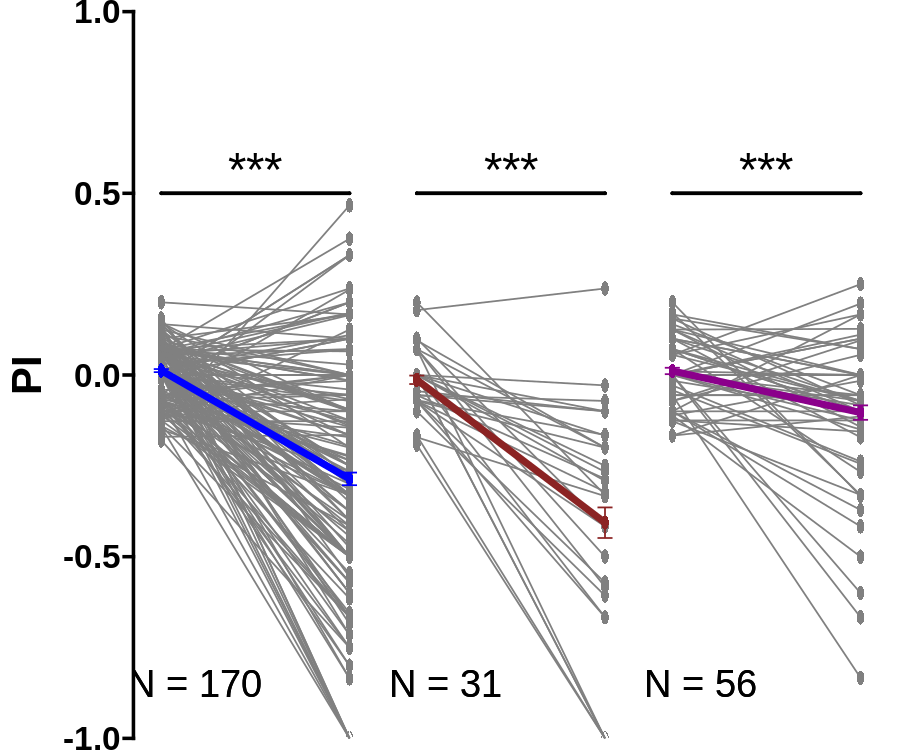

In [8]:
ratio=2.5
size_unit=2.5
panel2A <- learning_plot(
    panel2_data_long, "experiment", "horizontal", y_limits=y_limits_panel2,
    colors=colors_panel2[1:length(experiments)], test=paired_t_test,
    map_signif_level=TRUE,
    starsize=10, textsize=8,
    hjust_text=0.25,
    y_annotation=0.5
)
save_learning_plot(plot = panel2A, filename = "figures/panel2A.svg", ratio=ratio, size_unit=size_unit)
options(repr.plot.height=size_unit*ratio, repr.plot.width=size_unit*panel2A$n_facets)
panel2A

Warning message in `[.data.table`(data, , `:=`(test__, NULL)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Warning message in `[.data.table`(data, , `:=`(test__, NULL)):
“Column 'test__' does not exist to remove”


[1] "Outliers: "
     id   group__         PRE       POST         dPI outlier
 1:   5 20min STM -0.05500000  0.3300000  0.38500000    TRUE
 2:  10 20min STM  0.14000000 -1.0000000 -1.14000000    TRUE
 3:  17 20min STM  0.07000000  0.3750000  0.30500000    TRUE
 4:  18 20min STM  0.00000000  0.3300000  0.33000000    TRUE
 5:  50 20min STM  0.10000000 -1.0000000 -1.10000000    TRUE
 6: 151 20min STM  0.14000000 -1.0000000 -1.14000000    TRUE
 7: 154 20min STM  0.00000000  0.3300000  0.33000000    TRUE
 8: 156 20min STM  0.03000000 -1.0000000 -1.03000000    TRUE
 9: 381   3hr STM -0.10000000  0.1666667  0.26666667    TRUE
10: 383   3hr STM  0.00000000  0.1964286  0.19642857    TRUE
11: 428 20min STM -0.12500000  0.4666667  0.59166667    TRUE
12: 440   3hr STM -0.05555556 -0.8333333 -0.77777778    TRUE
13: 502   3hr STM  0.00000000 -0.6666667 -0.66666667    TRUE
14: 508   1hr STM  0.07142857 -1.0000000 -1.07142857    TRUE
15: 509   1hr STM  0.17857143  0.2380952  0.05952381    TRUE
16: 569

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 3


Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

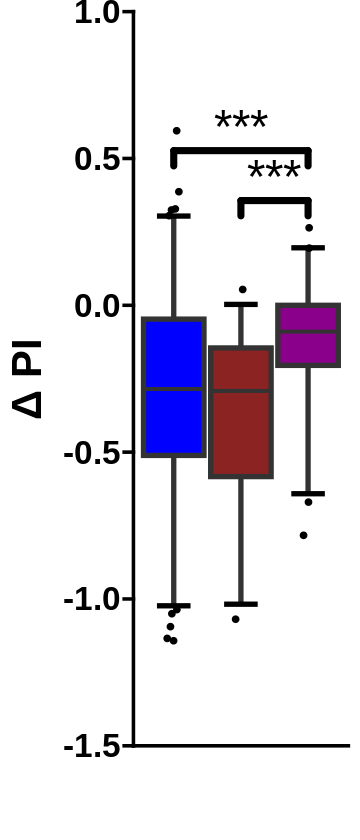

In [9]:
ratio=7
size_unit=1
panel2B <- summary_plot(
    data=panel2_data_long,
    group = "experiment", 
    comparisons = list(
        c("20min STM", "3hr STM"),
        c("1hr STM", "3hr STM")
    ),
    map_signif_level=T,
    annotation_y=c(0.44, .27),
    test=unpaired_t_test,
    colors=colors_panel2[1:length(experiments)],
    x_labels_angle=45,
    y_limits=c(-1.5, 1),
    starsize=10,
    text_y_size=20,
    title_y_size=25,
    percentile=c(0.025, 0.975)
)
panel2B$gg <- panel2B$gg + theme(
    axis.text.x=element_blank(),
    axis.ticks.x=element_blank()
)
options(repr.plot.width=panel2B$n_facets*size_unit, repr.plot.height=size_unit*ratio )
panel2B
save_summ_plot(plot=panel2B, filename = "figures/panel2B.svg", size_unit=size_unit, ratio=ratio)

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in grid.Call(C_textBounds, as.graphi

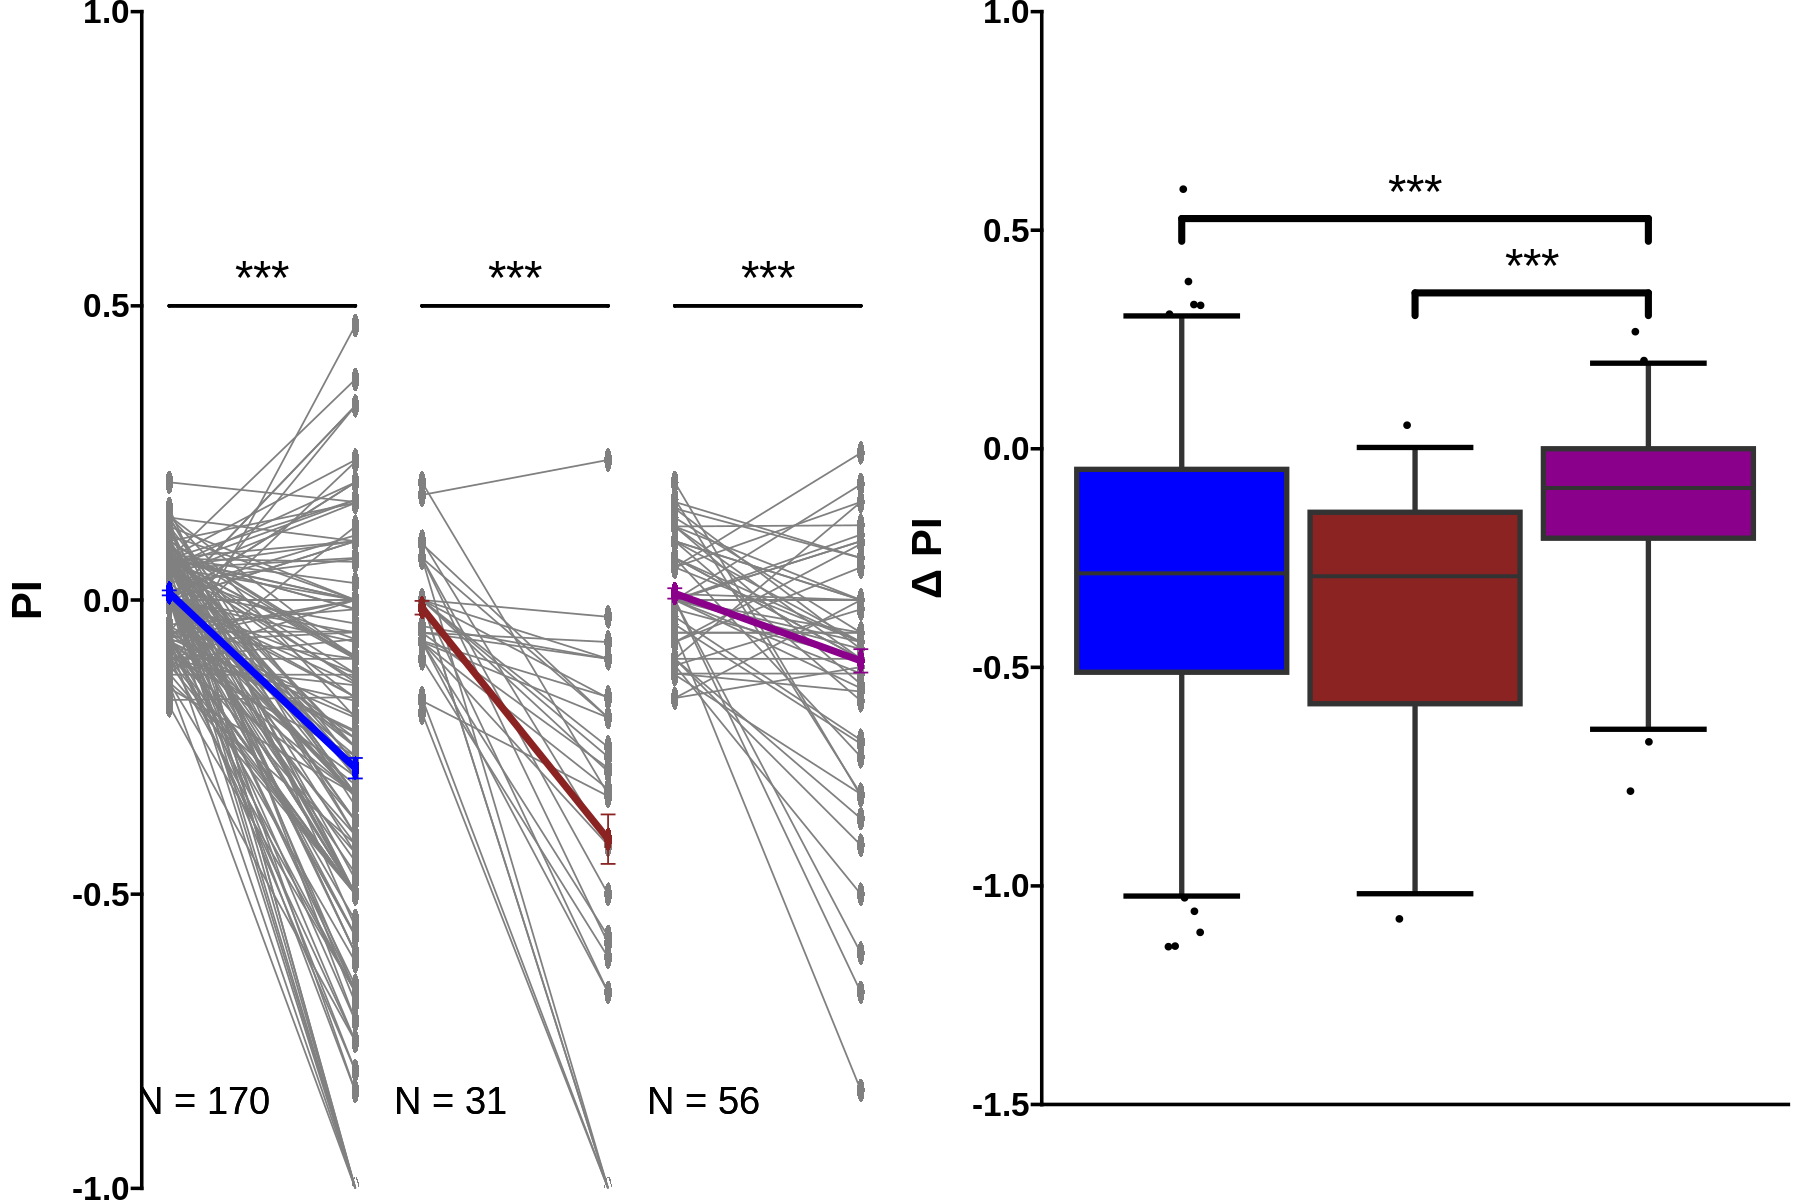

In [10]:
options(repr.plot.width=15)
options(repr.plot.height=10)
gg <- cowplot::plot_grid(panel2A$gg, panel2B$gg, ncol=2)
ggsave(plot = gg, filename = "figures/Figure_2.pdf", width=options()$repr.plot.width, height=options()$repr.plot.height)
gg